# Tes `SORA` dengan data SAO 184043

In [1]:
%config InlineBackend.figure_format = 'retina'

from sora import LightCurve, Body, Star, Observer, Occultation
import arviz as az
az.style.use('arviz-darkgrid')

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import os

from astropy.time import Time
import astropy.units as u

import numpy as np

from skyfield.api import load

# plt.rcParams['figure.figsize'] = (12,5)

pd.set_option('display.float_format',  '{:}'.format)

SORA version: 0.2.1


In [2]:
df = pd.read_csv('sao-184043.csv', sep=',')
df.tail()

,FrameNum,timeInfo,signal-stack,appsum-stack,avgbkg-stack,stdbkg-stack,nmaskpx-stack,maxpx-stack,xcentroid-stack,ycentroid-stack
996,7396.0,[12:52:15.9033782],7902.0,2431328.0,29918.83,1492.46,-81,35232,318.0,201.0
997,7397.0,[12:52:15.9134778],-14946.0,2414912.0,29998.25,1521.25,-81,35328,318.0,201.0
998,7398.0,[12:52:15.9235773],17477.0,2440512.0,29914.01,1549.09,-81,34976,318.0,201.0
999,7399.0,[12:52:15.9336769],27083.0,2453008.0,29949.69,1581.02,-81,34816,318.0,201.0
1000,7400.0,[12:52:15.9437764],-522.0,2420576.0,29890.1,1543.69,-81,34112,318.0,201.0


In [3]:
# hilangkan karakter [ dan ] dari data
df['timeInfo'] = df['timeInfo'].map((lambda x: x.lstrip('[').rstrip(']')))

# ubah ke format waktu dan ambil tanggal dan jamnya
df['timeInfo'] = pd.to_datetime(df['timeInfo'])

df.tail()

,FrameNum,timeInfo,signal-stack,appsum-stack,avgbkg-stack,stdbkg-stack,nmaskpx-stack,maxpx-stack,xcentroid-stack,ycentroid-stack
996,7396.0,2022-07-29 12:52:15.903378,7902.0,2431328.0,29918.83,1492.46,-81,35232,318.0,201.0
997,7397.0,2022-07-29 12:52:15.913477,-14946.0,2414912.0,29998.25,1521.25,-81,35328,318.0,201.0
998,7398.0,2022-07-29 12:52:15.923577,17477.0,2440512.0,29914.01,1549.09,-81,34976,318.0,201.0
999,7399.0,2022-07-29 12:52:15.933676,27083.0,2453008.0,29949.69,1581.02,-81,34816,318.0,201.0
1000,7400.0,2022-07-29 12:52:15.943776,-522.0,2420576.0,29890.1,1543.69,-81,34112,318.0,201.0


In [4]:
data = df[['FrameNum','timeInfo','signal-stack']]
data.columns = ['Frame','Time', 'Value']
data.tail()

,Frame,Time,Value
996,7396.0,2022-07-29 12:52:15.903378,7902.0
997,7397.0,2022-07-29 12:52:15.913477,-14946.0
998,7398.0,2022-07-29 12:52:15.923577,17477.0
999,7399.0,2022-07-29 12:52:15.933676,27083.0
1000,7400.0,2022-07-29 12:52:15.943776,-522.0


In [5]:
data_cp = data.copy()

# data_cp['Value2'] = data_cp['Value'] + 20000
data_cp['JD'] = Time(data_cp['Time']).jd

data_cp['frac_JD'] = data_cp['JD'] - np.floor(data_cp['JD']).astype(int)
data_cp

,Frame,Time,Value,JD,frac_JD
0,6400.0,2022-07-29 12:52:05.844155,43742.0,2459790.036178752,0.03617875184863806
1,6401.0,2022-07-29 12:52:05.854254,53859.0,2459790.0361788687,0.03617886872962117
2,6402.0,2022-07-29 12:52:05.864354,69091.0,2459790.0361789856,0.036178985610604286
3,6403.0,2022-07-29 12:52:05.874453,82940.0,2459790.0361791025,0.0361791024915874
4,6404.0,2022-07-29 12:52:05.884553,24076.0,2459790.0361792194,0.036179219372570515
...,...,...,...,...,...
996,7396.0,2022-07-29 12:52:15.903378,7902.0,2459790.036295178,0.0362951778806746
997,7397.0,2022-07-29 12:52:15.913477,-14946.0,2459790.0362952948,0.036295294761657715
998,7398.0,2022-07-29 12:52:15.923577,17477.0,2459790.0362954116,0.03629541164264083
999,7399.0,2022-07-29 12:52:15.933676,27083.0,2459790.0362955285,0.03629552852362394


Text(0.5, 0, 'Frames')

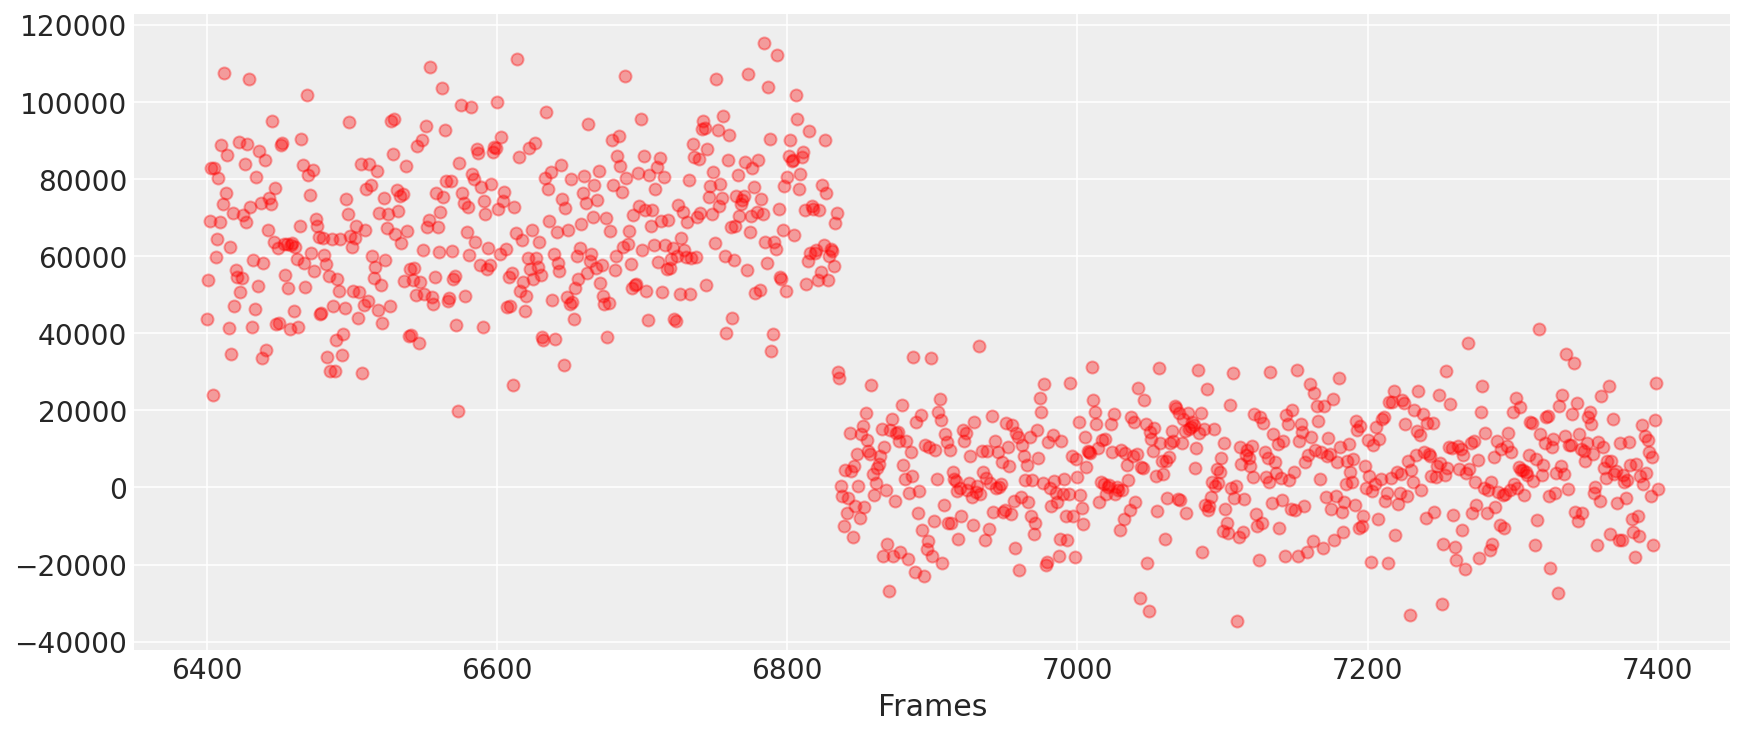

In [6]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(data_cp['Frame'], data_cp['Value'], 'ro', alpha=0.35)
# ax.set_xlim(3300, 3700)
ax.set_xlabel('Frames')

## Normalisasi data

In [7]:
data_cp['value_scaled'] = data_cp['Value']/(data_cp['Value'].std()*2)
# value_scaled = (data['Value'] - data['Value'].mean()) / data['Value'].std()

Text(0.5, 0, 'Julian Date')

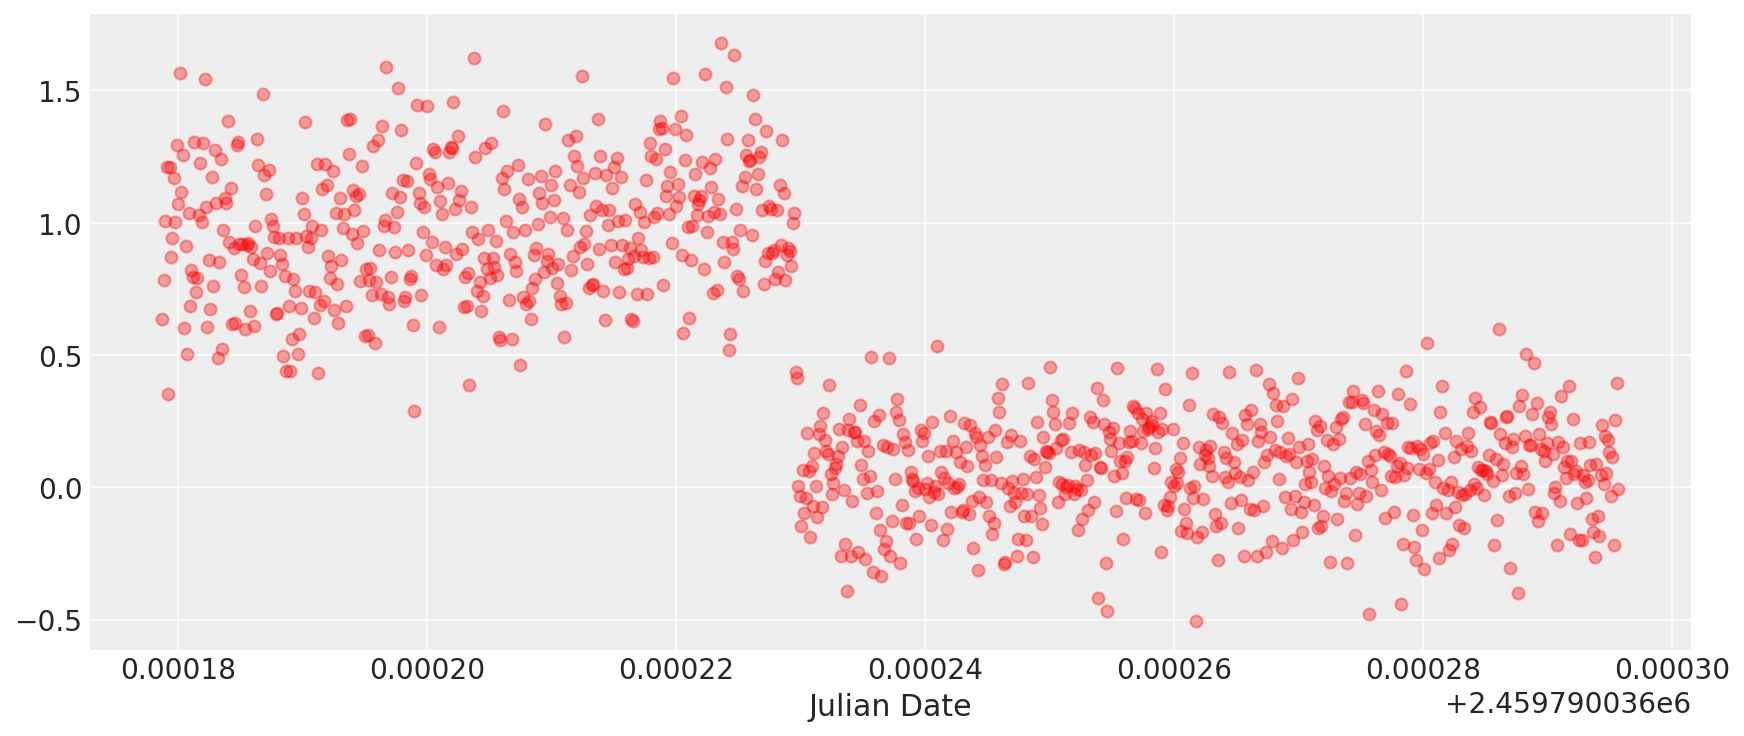

In [8]:
fig, ax = plt.subplots(figsize=(12,5))
# fig, ax = plt.subplots()
# ax.plot(data['frac_JD'], value_scaled, 'ro', alpha=0.35)
ax.plot(data_cp['JD'], data_cp['value_scaled'], 'ro', alpha=0.35)
ax.set_xlabel('Julian Date')

## Tulis hasil normalisasi ke file `csv`

In [9]:
data_cp.to_csv('lc_sao184043.csv', header=False, columns=['JD', 'value_scaled'], index=False, sep='\t')

## Siapkan kurva cahaya observasi untuk `SORA`

In [10]:
lc = LightCurve(name='SAO 184043', file='lc_sao184043.csv', exptime=0.01)

print(lc)

Light curve name: SAO 184043
Initial time: 2022-07-29 12:52:05.844 UTC
End time:     2022-07-29 12:52:15.944 UTC
Duration:     0.168 minutes
Time offset:  0.000 seconds

Exposure time:    0.0100 seconds
Cycle time:       0.0101 seconds
Num. data points: 1001


There is no occultation associated with this light curve.

Object LightCurve model was not fitted.

Immersion and emersion times were not fitted or instantiated.




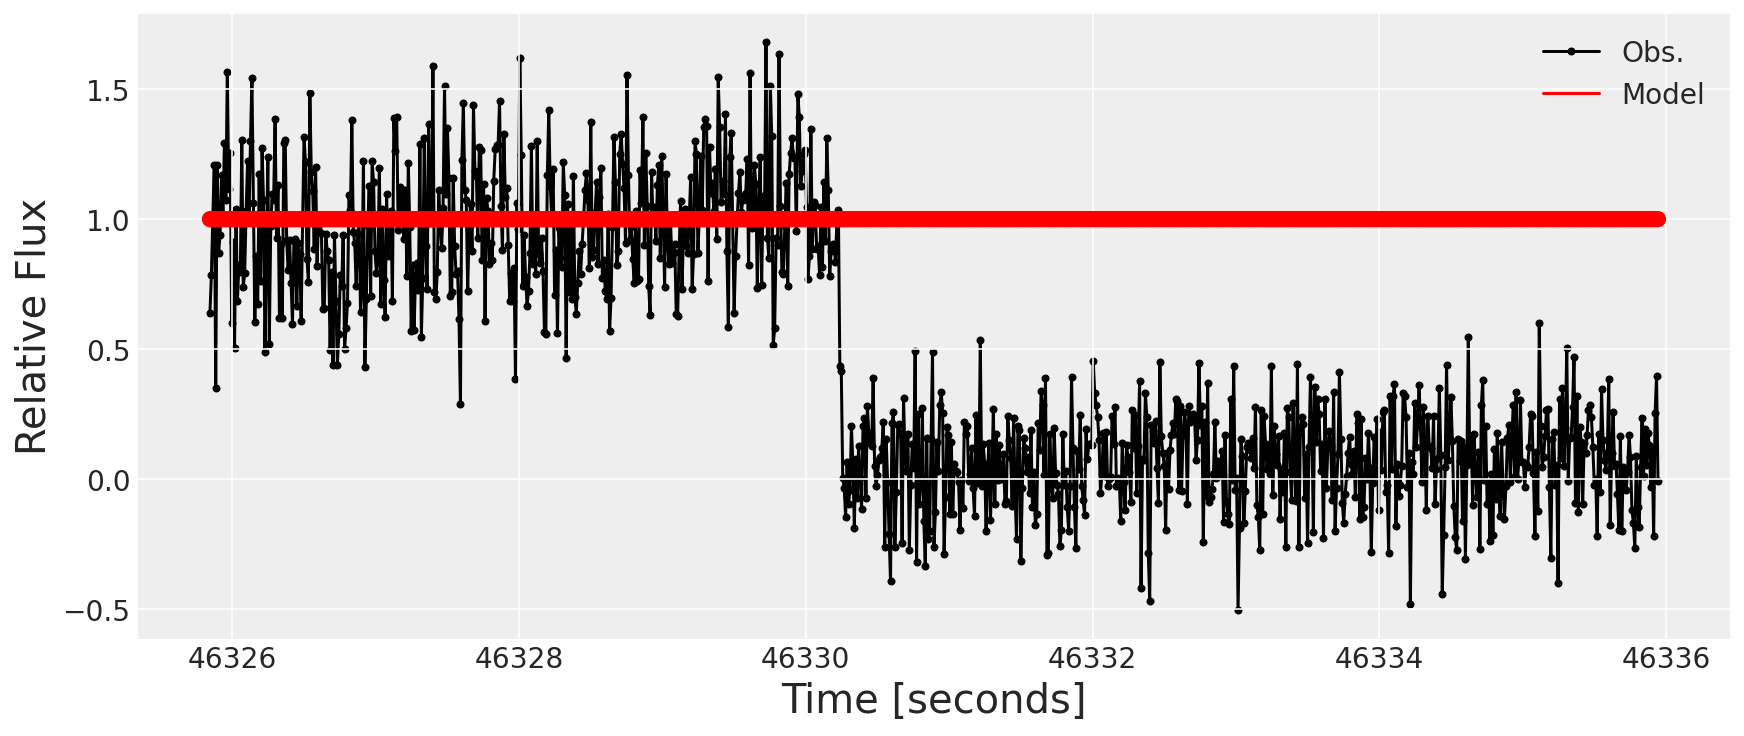

In [11]:
plt.figure(figsize=(12,5))
lc.plot_lc()
# plt.xlim(46628,46633)

{'rank': 1,
 'occultation_duration': 5.7107113301754,
 'central_time': 46322.98923254013,
 'immersion_time': 46320.13387687504,
 'emersion_time': 46325.84458820522,
 'time_err': 0.005049258470535278,
 'depth': 0.9102203468306955,
 'depth_err': 0.18513749360926193,
 'baseline': 0.978557470335841,
 'baseline_err': 0.24937626066831925,
 'snr': 4.916456029980302,
 'occ_mask': array([ True, False, False, ...,  True,  True,  True])}

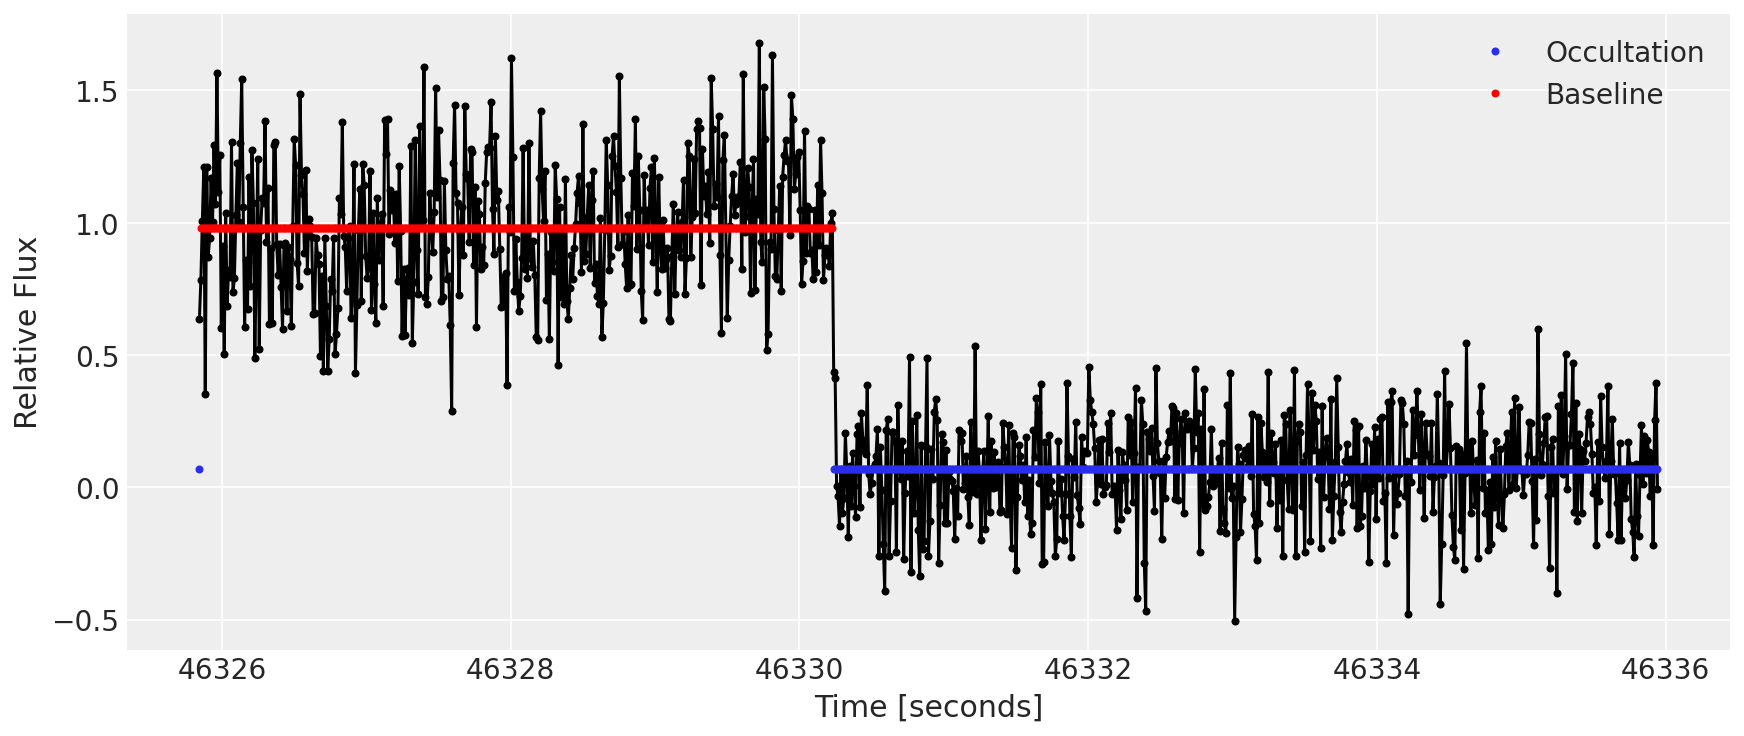

In [12]:
plt.figure(figsize=(12,5))
tes = lc.occ_detect(plot=True)
tes

In [13]:
print('Exposure time:   {:.4f} s'.format(lc.exptime))
print('Cycle time:      {:.4f} s'.format(lc.cycle))

Exposure time:   0.0100 s
Cycle time:      0.0101 s


## Pembuatan model

Model kurva cahaya okultasi oleh `SORA` memerlukan beberapa input:
 - Kecepatan bayangan saat *event*, dalam km/s
 - Jarak obyek, dalam AU
 - $\lambda$ pusat dan $\Delta \lambda$ (atau *bandwidth*), dalam mikron
 - Proyeksi diameter bintang pada jarak obyek, dalam km

### A. Jarak obyek penutup saat pengamatan

Untuk okultasi Bulan, obyek penutup adalah Bulan. Pengamatan dilakukan pada tanggal **10 Juli 2022 pukul 12:51:01.21 UT**. Ephemeris diambil dari https://ssd.jpl.nasa.gov/ftp/eph/planets/ascii/.

In [14]:
# load timescale dan tampilkan waktu saat ini
ts = load.timescale()

# custom waktu untuk yyyy, mm, dd, hh, mm, ss
t = ts.utc(2022, 7, 10, 12, 51, 1.21)

In [15]:
# Load the JPL ephemeris DE430 (covers 1549-2650) dan cari jarak Bumi-Bulan
planets = load('de430.bsp')
earth, moon = planets['earth'], planets['moon']

In [16]:
# posisi Bulan dari Bumi
astrometric = earth.at(t).observe(moon)
ra, dec, distance = astrometric.radec()

In [17]:
# tampilkan koordinat Bulan dan jarak Bulan dalam AU
print(ra)
print(dec)
print(distance.au)

15h 59m 54.29s
-21deg 37' 29.6"
0.002436456820491575


In [18]:
d_moon = distance.au
d_moon

0.002436456820491575

In [19]:
lc.set_dist(dist=d_moon)

lc.dist

0.002436456820491575

### B. Nilai $\lambda_0$ dan *bandwidth* $\Delta \lambda$

In [20]:
lc.set_filter(central_bandpass=0.55, delta_bandpass=0.2)

print('Observational wavelength centred at {:1.3f} with a bandwidth of {:1.3f} microns'
      .format(lc.central_bandpass,lc.delta_bandpass))

Observational wavelength centred at 0.550 with a bandwidth of 0.200 microns


### C. Proyeksi diameter bintang pada jarak obyek penutup

In [21]:
lc.fresnel_scale

0.009969907807172386

In [22]:
from sora import Star
from sora.star import kervella, van_belle

In [23]:
star = Star(coord='16 01 55.4547295632 -21 58 49.398900888')

c:\Users\User\.conda\envs\work2\lib\site-packages\sora\star\core.py:338: UserWarning: This star was indicated as an source with duplicate sources Please be aware that its positions must be handled with care.
  warnings.warn('This star was indicated as an source with duplicate sources '+


1 Gaia-EDR3 star found G=7.162432
star coordinate at J2016.0: RA=16h01m55.44079s +/- 0.0269 mas, DEC=-21d58m49.7835s +/- 0.0177 mas



In [24]:
star.mag

{'G': 7.162432,
 'B': 7.2729997634887695,
 'V': 7.193999767303467,
 'R': 7.139999866485596,
 'J': 6.927000045776367,
 'H': 6.945000171661377,
 'K': 6.9019999504089355}

In [25]:
from sora import Observer

bosscha = Observer(name='Bosscha Observatory', code='299')

pos = star.get_position(time='2022-07-10 12:51:1.21', observer=bosscha)
print(pos.to_string('hmsdms', precision=10))

16h01m55.4347516213s -21d58m49.9394118033s


In [26]:
star.error_at(time='2022-07-10 12:51:1.21')

(<Quantity 0.20754812 mas>, <Quantity 0.15600759 mas>)

In [27]:
diameter = star.apparent_diameter(distance=d_moon)

diameter

Apparent diameter using Kervella et al. (2004)


<Quantity 0.00025463 km>

In [28]:
diameter.value

0.0002546273170880984

In [29]:
lc.set_star_diam(d_star=diameter.value)

### D. Kecepatan bayangan Bulan di Bumi

Bulan bergerak relatif terhadap bintang latar belakang dengan kecepatan 0.55 arcsec/s. Ubah nilai ini ke dalam km/s.

In [30]:
distance.km

364488.7523980317

In [31]:
from astropy.coordinates import Angle
ang_vel = 0.55*u.arcsec # dalam arcsec/s

lin_vel = distance.km * np.tan(ang_vel)

lin_vel

<Quantity 0.97190024>

In [32]:
lc.set_vel(vel=lin_vel.value)

{'rank': 1,
 'occultation_duration': 5.7107113301754,
 'central_time': 46322.98923254013,
 'immersion_time': 46320.13387687504,
 'emersion_time': 46325.84458820522,
 'time_err': 0.005049258470535278,
 'depth': 0.9102203468306955,
 'depth_err': 0.18513749360926193,
 'baseline': 0.978557470335841,
 'baseline_err': 0.24937626066831925,
 'snr': 4.916456029980302,
 'occ_mask': array([ True, False, False, ...,  True,  True,  True])}

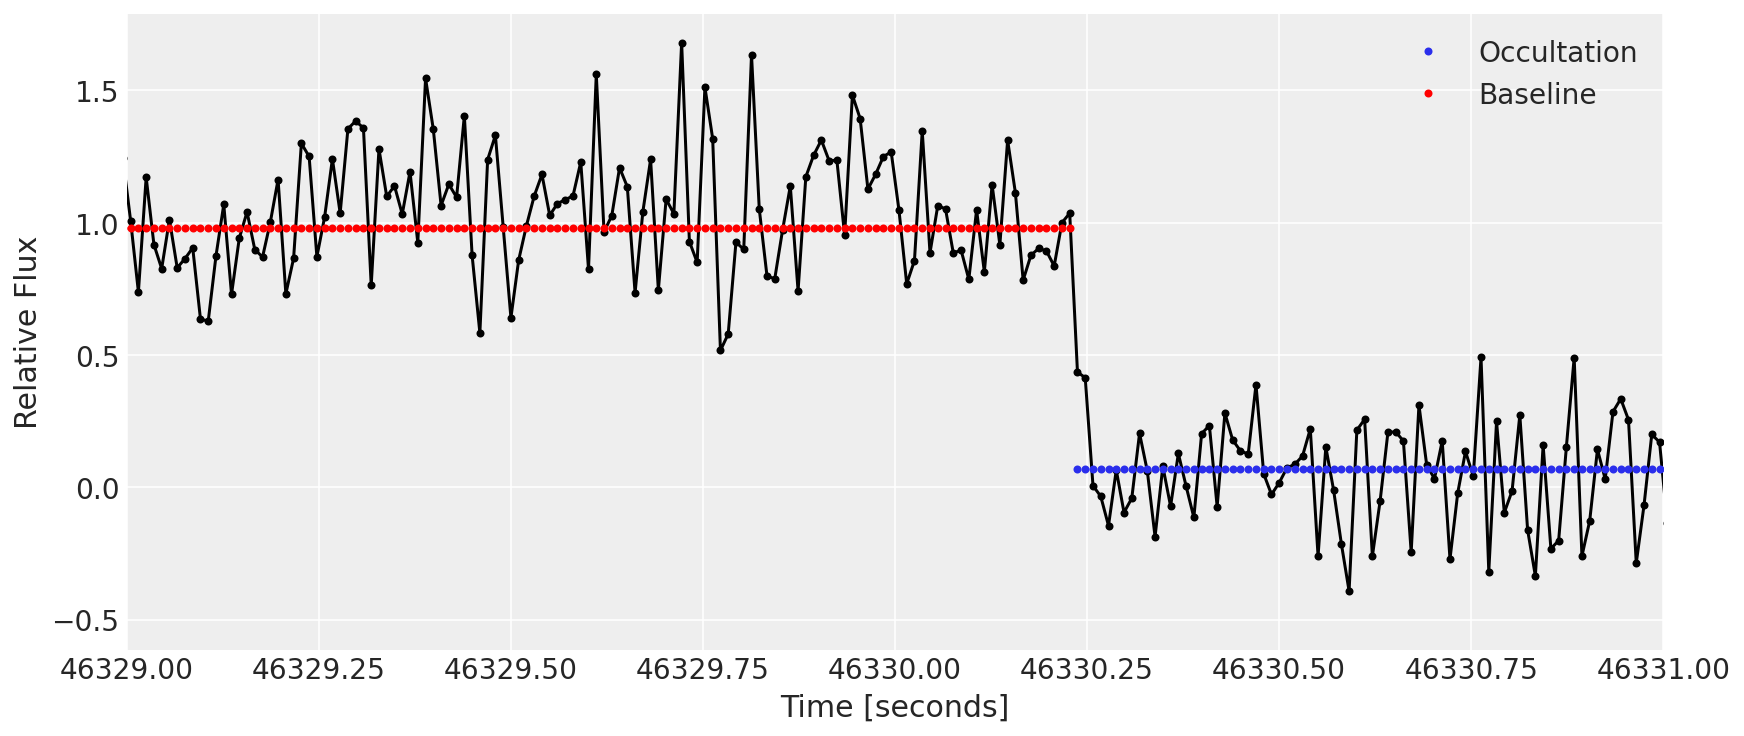

In [33]:
plt.figure(figsize=(12,5))
tes2 = lc.occ_detect(plot=True)
plt.xlim(46329, 46331)
tes2

**Parameter untuk model**

In [34]:
immersion_time = 46330.250  # seconds relative to tref
emersion_time  = 46332.000  # seconds relative to tref
opacity = 1.0            # 1.0 == opaque; 0.0 == transparent

tmin = immersion_time  - 2 # seconds relative to tref
tmax = emersion_time   + 2 # seconds relative to tref

mask = (lc.time > tmin) & (lc.time < tmax)

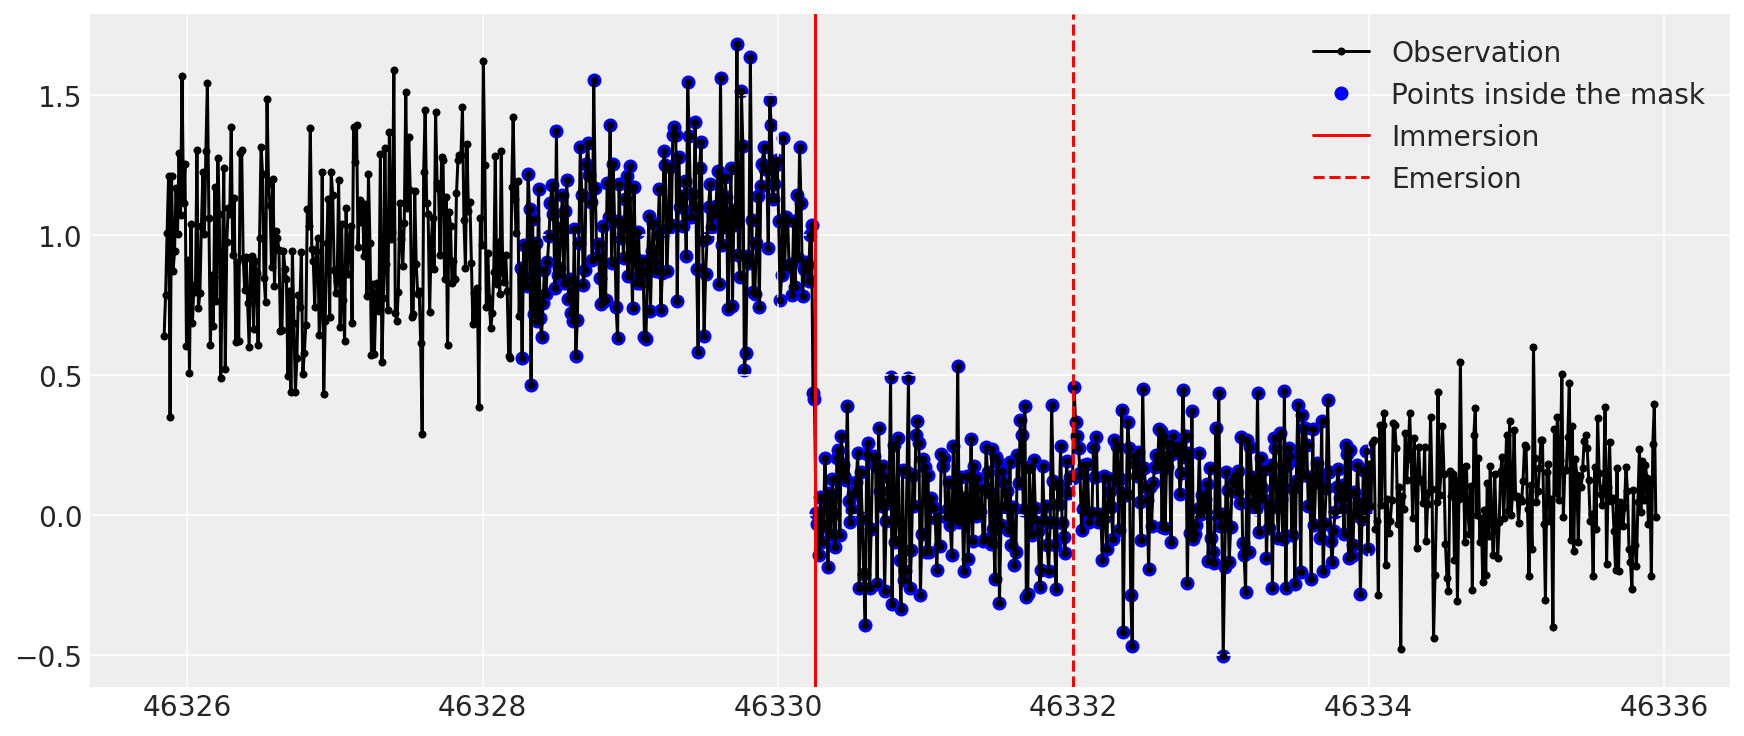

In [35]:
plt.figure(figsize=(12,5))
plt.plot(lc.time,lc.flux,'k.-',zorder=1,label='Observation')
plt.plot(lc.time[mask],lc.flux[mask],'bo',zorder=0,label='Points inside the mask')
plt.axvline(immersion_time,color='r',linestyle='-',label='Immersion')
plt.axvline(emersion_time,color='r',linestyle='--',label='Emersion')
plt.legend()
# plt.show()

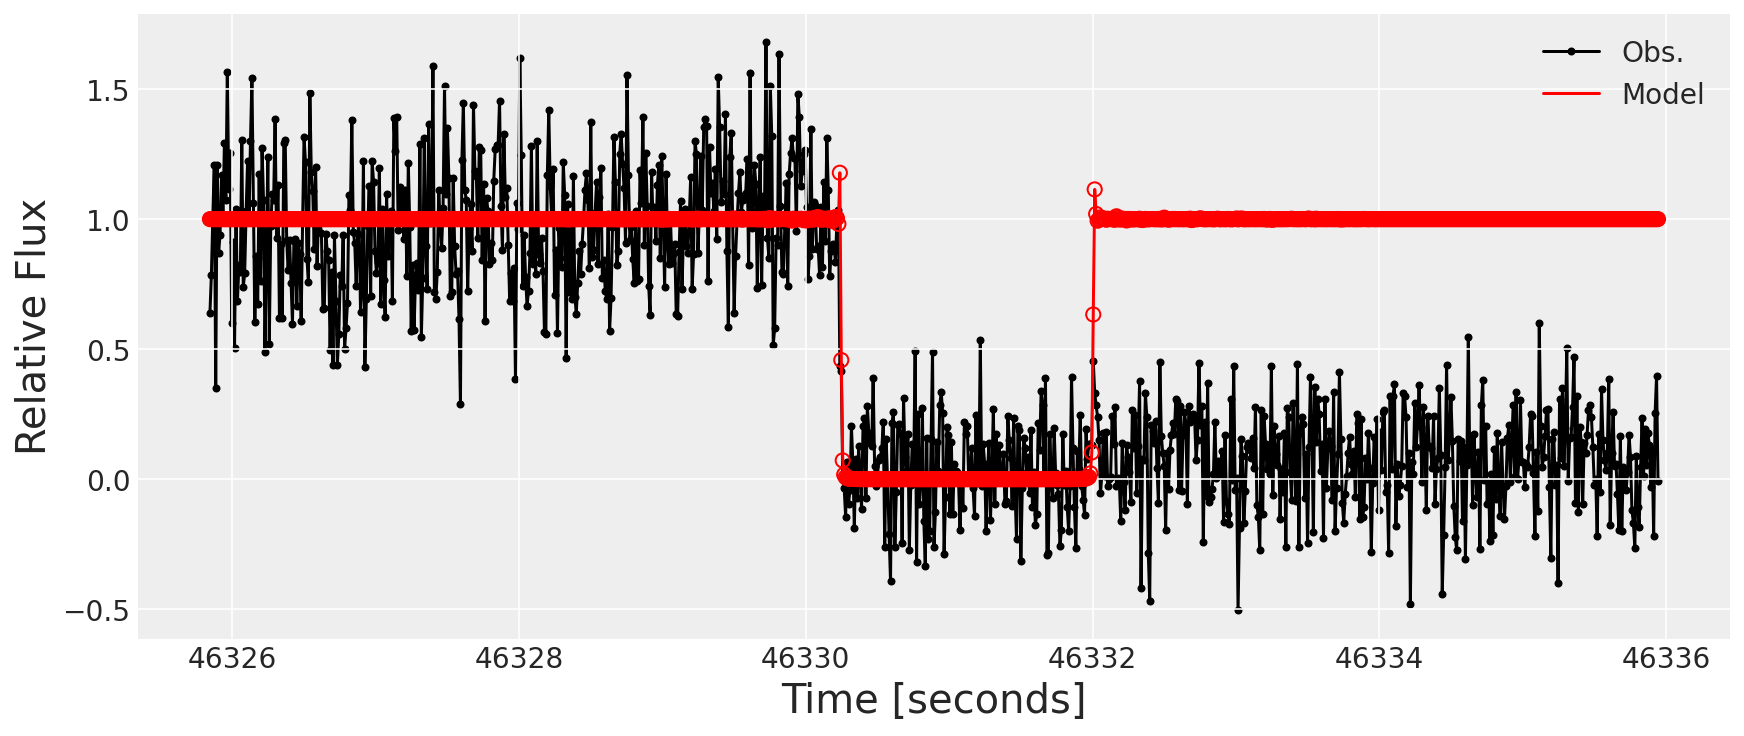

In [36]:
plt.figure(figsize=(12,5))
lc.occ_model(immersion_time, emersion_time, opacity, mask)

lc.plot_lc()
# plt.xlim(61789,61793)


In [37]:
# lc_chi2 = lc.occ_lcfit(loop=1000)

In [38]:
# print(lc_chi2)

In [39]:
# lc_chi2.plot_chi2()

Karena pada pengamatan ini tidak mengalami *emmersion*, maka plot *immersion* saja.

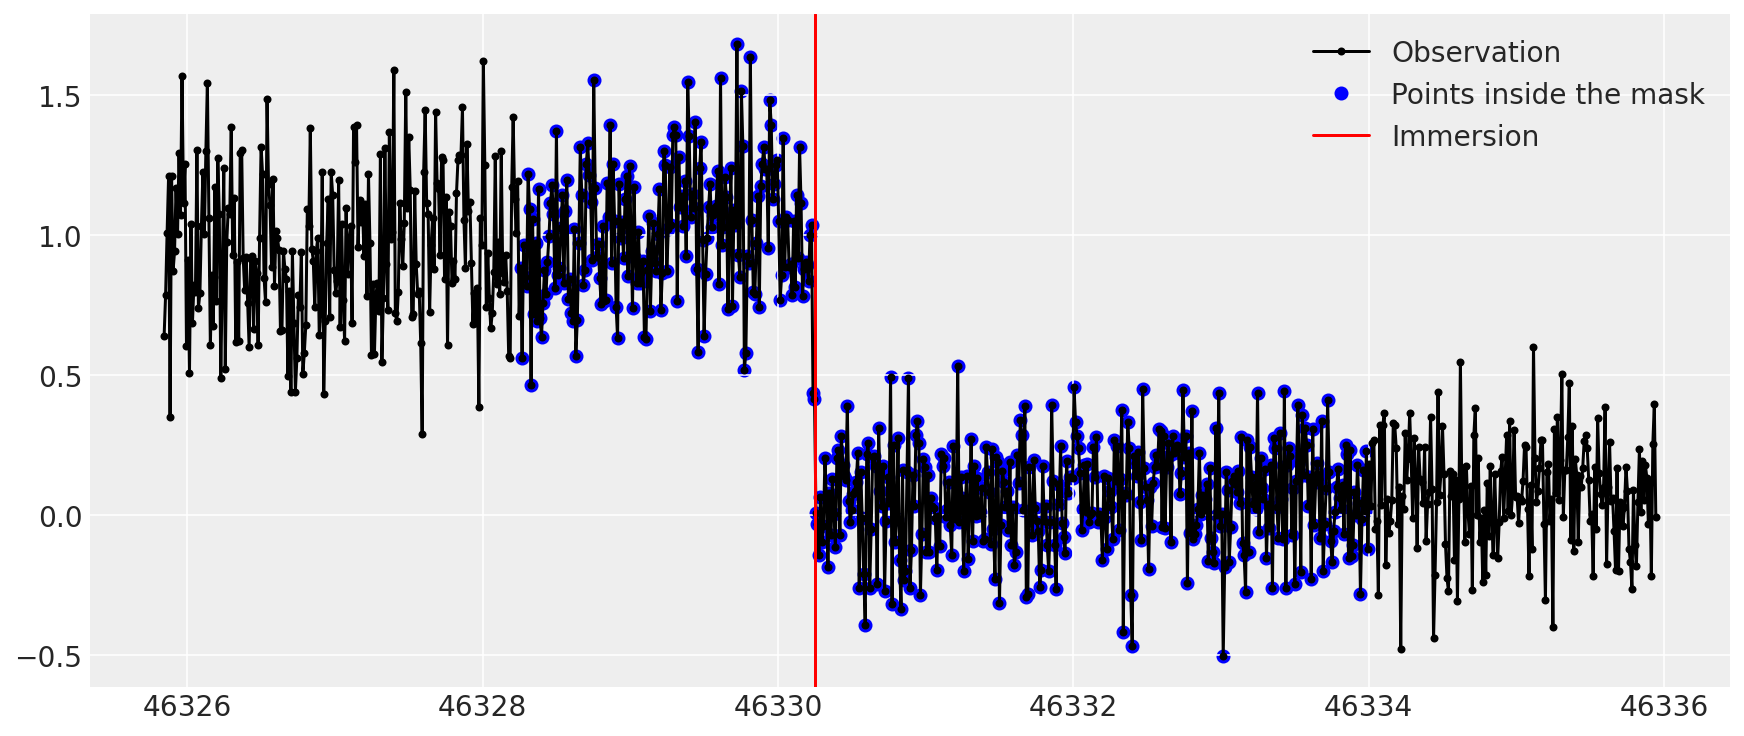

In [40]:
plt.figure(figsize=(12,5))
plt.plot(lc.time,lc.flux,'k.-',zorder=1,label='Observation')
plt.plot(lc.time[mask],lc.flux[mask],'bo',zorder=0,label='Points inside the mask')
plt.axvline(immersion_time, color='r',linestyle='-',label='Immersion')
plt.legend()

In [41]:
lc_chi2_imm = lc.occ_lcfit(tmin=tmin, tmax=tmax, immersion_time=immersion_time, loop=1000)

LightCurve fit: |████████████████████████████████████████|  - 100% 


In [42]:
print(lc_chi2_imm)

Minimum chi-square: 424.361
Number of fitted points: 569
Number of fitted parameters: 1
Minimum chi-square per degree of freedom: 0.747

immersion:
    1-sigma: 46330.239 +/- 0.004
    3-sigma: 46330.241 +/- 0.011



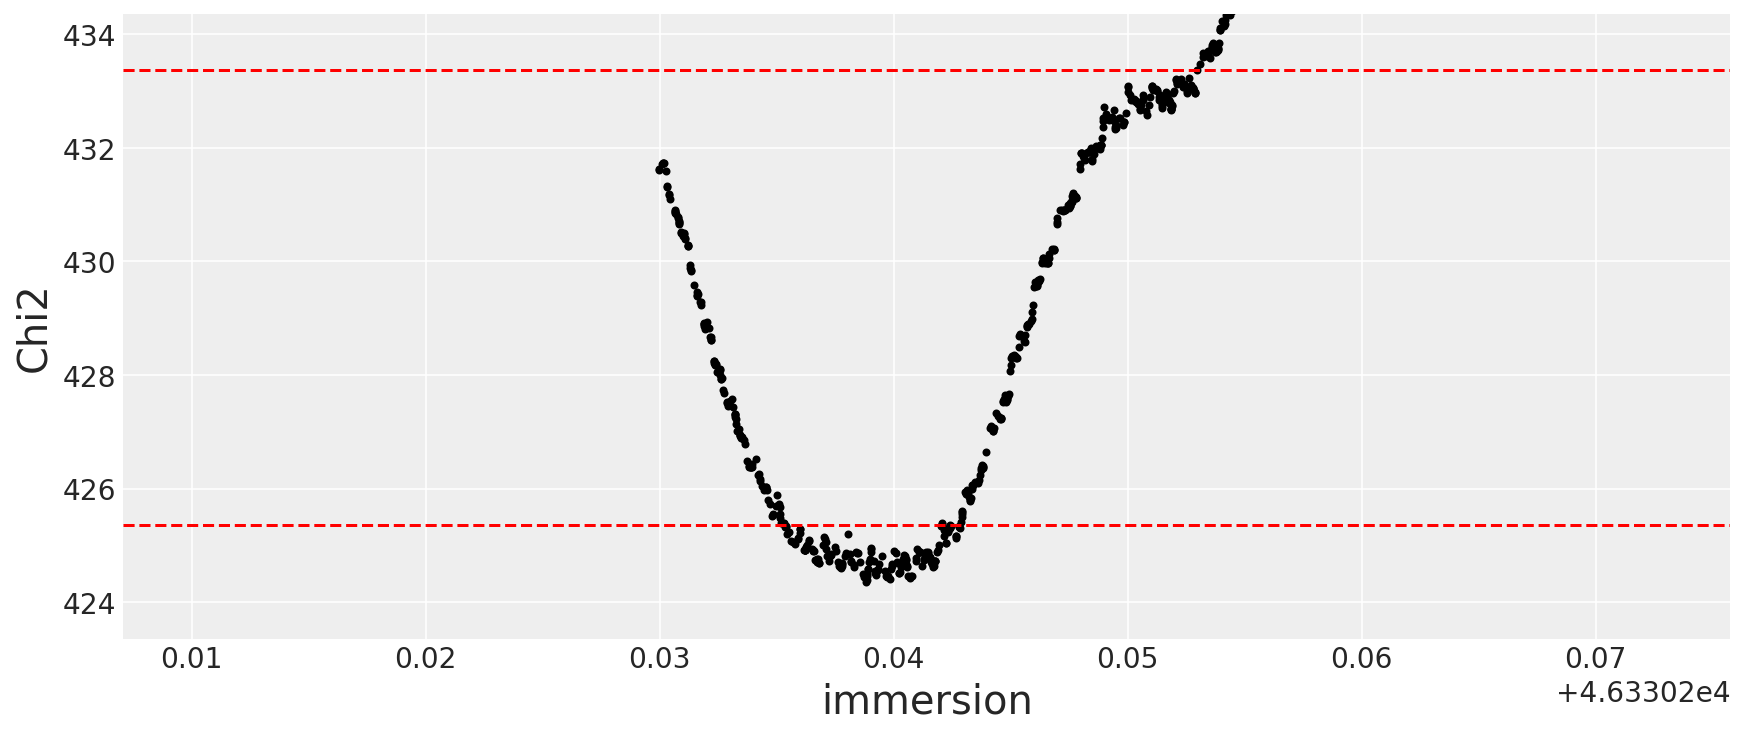

In [43]:
plt.figure(figsize=(12,5))
lc_chi2_imm.plot_chi2()

In [44]:
print(lc)

Light curve name: SAO 184043
Initial time: 2022-07-29 12:52:05.844 UTC
End time:     2022-07-29 12:52:15.944 UTC
Duration:     0.168 minutes
Time offset:  0.000 seconds

Exposure time:    0.0100 seconds
Cycle time:       0.0101 seconds
Num. data points: 1001

Bandpass:             0.550 +/- 0.200 microns
Object Distance:      0.00 AU
Used shadow velocity: 0.972 km/s
Fresnel scale:        0.010 seconds or 0.01 km
Stellar size effect:  0.000 seconds or 0.00 km
Inst. response:       0.010 seconds or 0.01 km
Dead time effect:     0.000 seconds or 0.00 km
Model resolution:     0.001 seconds or 0.00 km
Modelled baseflux:    0.979
Modelled bottomflux:  0.090
Light curve sigma:    0.233

Immersion and emersion times were not fitted or instantiated.

Monte Carlo chi square fit.

Minimum chi-square: 424.361
Number of fitted points: 569
Number of fitted parameters: 1
Minimum chi-square per degree of freedom: 0.747

immersion:
    1-sigma: 46330.239 +/- 0.004
    3-sigma: 46330.241 +/- 0.011




(46329.0, 46331.5)

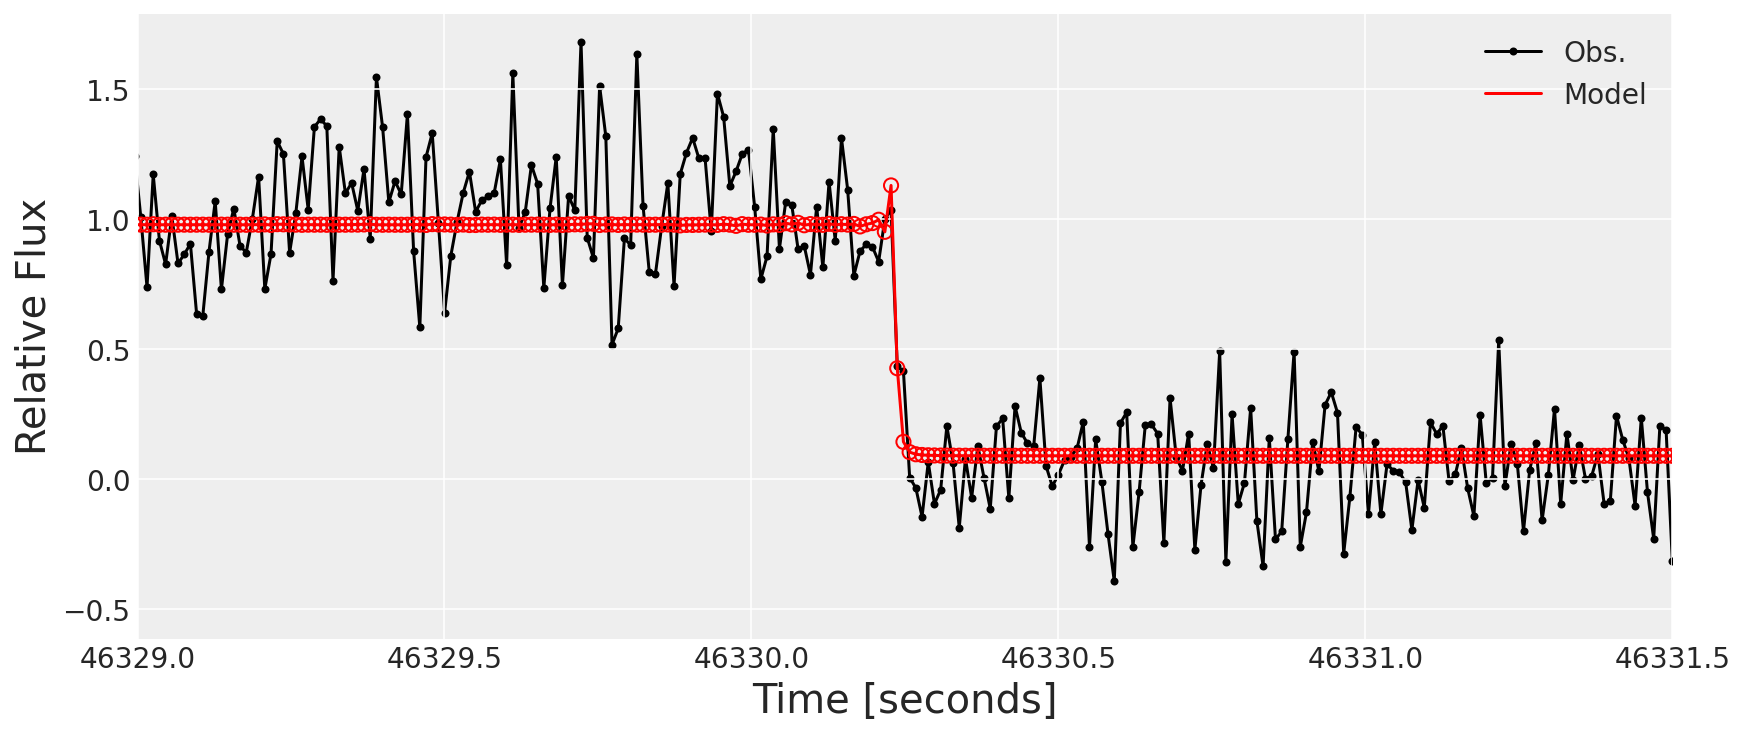

In [48]:
plt.figure(figsize=(12,5))
lc.plot_lc()
plt.xlim(46329.0, 46331.5)

(-0.3, 2.0)

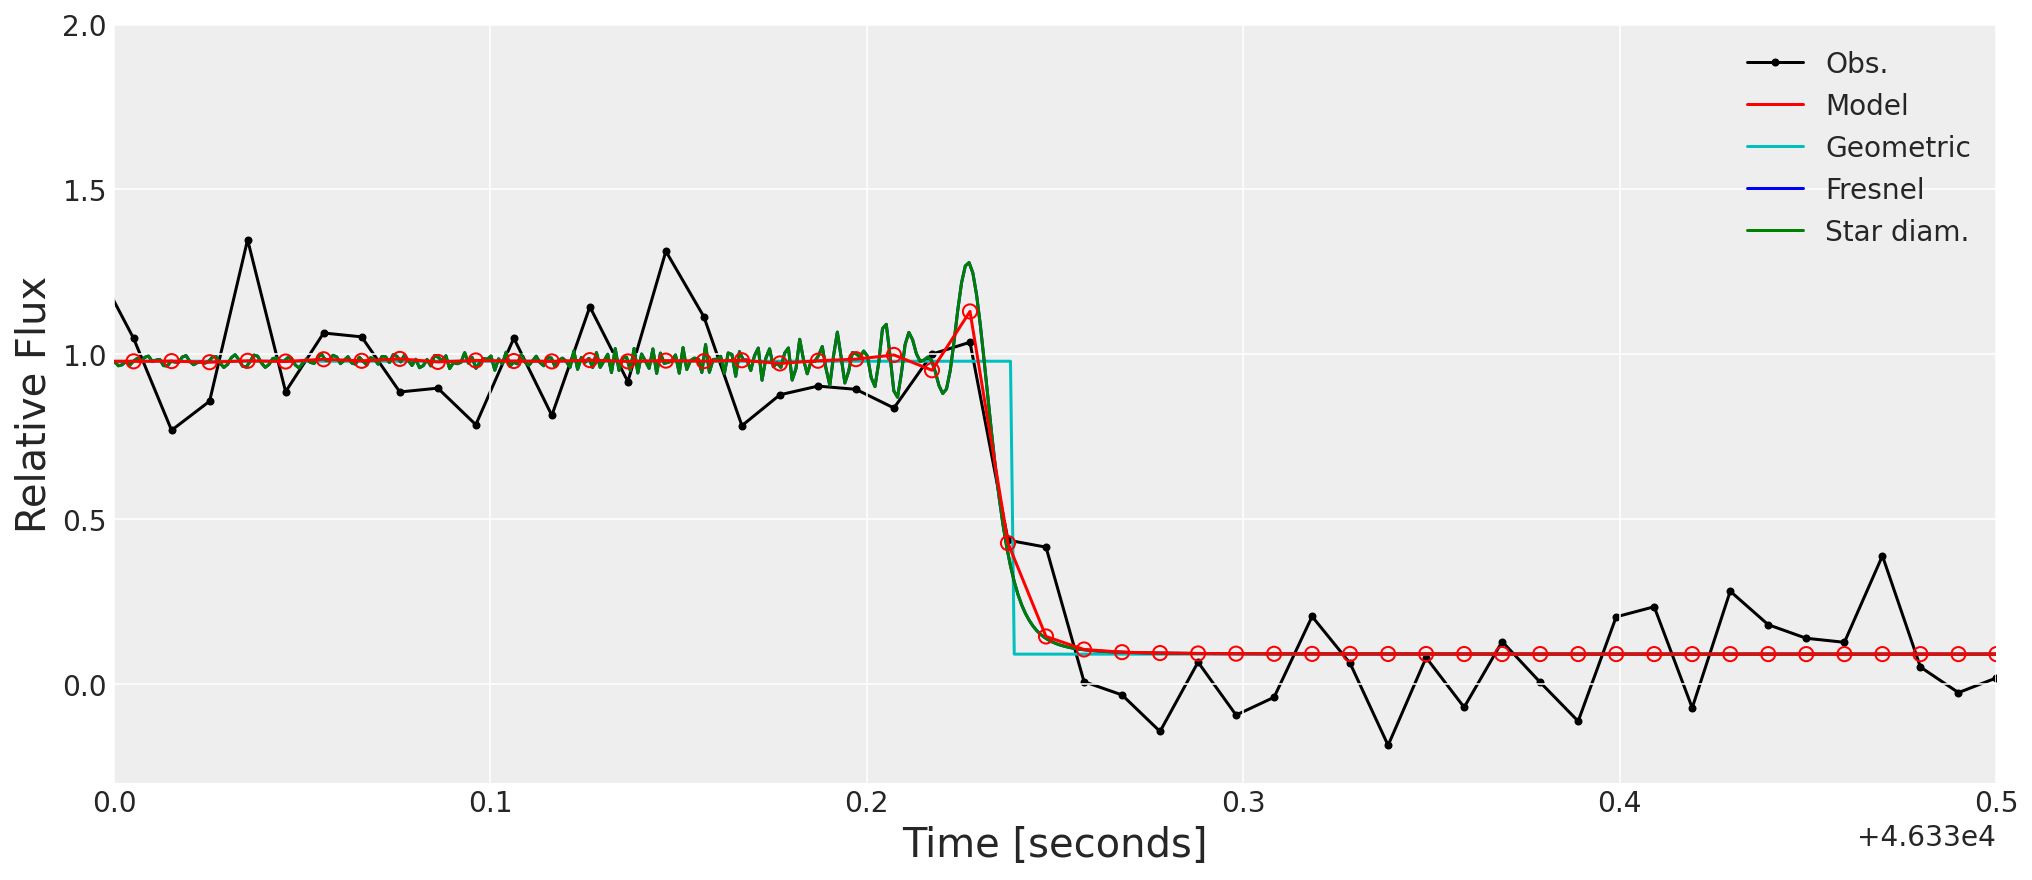

In [49]:
from matplotlib.markers import MarkerStyle


plt.figure(figsize=(14,6))
# plt.rcParams['lines.linewidth'] = 1
# plt.rcParams['lines.markersize'] = 15
# plt.rc('lines', markersize=3)

lc.plot_lc()
lc.plot_model()


plt.xlim(46330,46330.5)
plt.ylim(-0.3, 2.0)

In [50]:
lc.immersion

<Time object: scale='utc' format='iso' value=2022-07-29 12:52:10.239>